In [1]:
import nibabel as nib
import os
import numpy as np
import pandas as pd

In [2]:
'''
1: Subject ID
2: Rooster ID (4 last digits of subject ID)
3: Age
4: Sexe (0=female, 1=male)
5: Group (CN, EMCI, LMCI, AD)
6: Conversion (-1: CN/AD at baseline, 1: 16 months, 2: 24 months, 3: 36 months, 4: sMCI/no conversion after 36 months, 5: unknown)
7: MMSE
8: RAVLT
9: FAQ
10: CDR-SB
11: ADAS11
12: ADAS13

To separate sMCI and pMCI:
- pMCI: conversion = 1, 2 or 3
- sMCI: conversion = 4
'''

'\n1: Subject ID\n2: Rooster ID (4 last digits of subject ID)\n3: Age\n4: Sexe (0=female, 1=male)\n5: Group (CN, EMCI, LMCI, AD)\n6: Conversion (-1: CN/AD at baseline, 1: 16 months, 2: 24 months, 3: 36 months, 4: sMCI/no conversion after 36 months, 5: unknown)\n7: MMSE\n8: RAVLT\n9: FAQ\n10: CDR-SB\n11: ADAS11\n12: ADAS13\n\nTo separate sMCI and pMCI:\n- pMCI: conversion = 1, 2 or 3\n- sMCI: conversion = 4\n'

In [3]:
header_data = ['Subject ID','Rooster ID', 'Age', 'Sexe', 'Group', 'Conversion', 'MMSE', 'RAVLT', 'FAQ', 'CDR-SB','ADAS11']

In [4]:
data = pd.read_csv('/home/coleger/Desktop/CV/Alz/ADNI1/list_standardized_tongtong_2017.csv')

In [5]:
data.head()

,002_S_0295,295,84.8,1,CN,-1,28,56,0,3.00,3.00.1
0,002_S_0413,413,76.3,0,CN,-1,29,52,0,3.33,3.33
1,002_S_0559,559,79.3,1,CN,-1,30,48,0,6.00,6.00
2,002_S_0619,619,77.5,1,AD,-1,22,19,25,19.33,19.33
3,002_S_0685,685,89.6,0,CN,-1,30,36,0,3.67,3.67
4,002_S_0729,729,65.1,0,MCI,3,27,38,7,6.67,6.67


In [6]:
data.columns = header_data
data.head()

,Subject ID,Rooster ID,Age,Sexe,Group,Conversion,MMSE,RAVLT,FAQ,CDR-SB,ADAS11
0,002_S_0413,413,76.3,0,CN,-1,29,52,0,3.33,3.33
1,002_S_0559,559,79.3,1,CN,-1,30,48,0,6.00,6.00
2,002_S_0619,619,77.5,1,AD,-1,22,19,25,19.33,19.33
3,002_S_0685,685,89.6,0,CN,-1,30,36,0,3.67,3.67
4,002_S_0729,729,65.1,0,MCI,3,27,38,7,6.67,6.67


In [7]:
new_data = data[['Subject ID','Rooster ID', 'Age', 'Sexe', 'Group', 'Conversion']]
new_data.head()

,Subject ID,Rooster ID,Age,Sexe,Group,Conversion
0,002_S_0413,413,76.3,0,CN,-1
1,002_S_0559,559,79.3,1,CN,-1
2,002_S_0619,619,77.5,1,AD,-1
3,002_S_0685,685,89.6,0,CN,-1
4,002_S_0729,729,65.1,0,MCI,3


In [8]:
# Changement des noms pour la colonne conversion
new_data['Conversion'].replace(to_replace =1, value ='pMCI', inplace=True)
new_data['Conversion'].replace(to_replace =2, value ='pMCI', inplace=True)
new_data['Conversion'].replace(to_replace =3, value ='pMCI', inplace=True)

new_data['Conversion'].replace(to_replace =4, value ='sMCI', inplace=True)

# Changement des noms pour la colonne Sexe
new_data['Sexe'].replace(to_replace =0, value ='female', inplace=True)
new_data['Sexe'].replace(to_replace =1, value ='male', inplace=True)


new_data.head()

/tmp/ipykernel_6991/3016184317.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['Conversion'].replace(to_replace =1, value ='pMCI', inplace=True)
/tmp/ipykernel_6991/3016184317.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['Conversion'].replace(to_replace =2, value ='pMCI', inplace=True)
/tmp/ipykernel_6991/3016184317.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['Conversion'].replace(to_replac

,Subject ID,Rooster ID,Age,Sexe,Group,Conversion
0,002_S_0413,413,76.3,female,CN,-1
1,002_S_0559,559,79.3,male,CN,-1
2,002_S_0619,619,77.5,male,AD,-1
3,002_S_0685,685,89.6,female,CN,-1
4,002_S_0729,729,65.1,female,MCI,pMCI


In [9]:
new_data.Conversion.value_counts()

-1      419
pMCI    171
sMCI    129
5        98
Name: Conversion, dtype: int64

### One hot encoding sur CN et AD sMCI et pMCI

In [10]:
data_clean = pd.get_dummies(data=new_data, columns=['Group','Conversion','Sexe'])
data_clean.drop('Group_MCI', inplace=True, axis=1)
data_clean.drop('Conversion_-1', inplace=True, axis=1)
data_clean.drop('Conversion_5', inplace=True, axis=1)

data_clean.head()

,Subject ID,Rooster ID,Age,Group_AD,Group_CN,Conversion_pMCI,Conversion_sMCI,Sexe_female,Sexe_male
0,002_S_0413,413,76.3,0,1,0,0,1,0
1,002_S_0559,559,79.3,0,1,0,0,0,1
2,002_S_0619,619,77.5,1,0,0,0,0,1
3,002_S_0685,685,89.6,0,1,0,0,1,0
4,002_S_0729,729,65.1,0,0,1,0,1,0


In [11]:
data_clean.rename(columns = {'Group_AD':'AD', 'Group_CN':'CN',
                              'Conversion_pMCI':'pMCI','Conversion_sMCI':'sMCI'}, inplace = True)
data_clean.head()

,Subject ID,Rooster ID,Age,AD,CN,pMCI,sMCI,Sexe_female,Sexe_male
0,002_S_0413,413,76.3,0,1,0,0,1,0
1,002_S_0559,559,79.3,0,1,0,0,0,1
2,002_S_0619,619,77.5,1,0,0,0,0,1
3,002_S_0685,685,89.6,0,1,0,0,1,0
4,002_S_0729,729,65.1,0,0,1,0,1,0


construire name à partir de subject ID

In [12]:
data_clean['mask_filename'] = 'mask_n_mmni_fADNI_' + data_clean['Subject ID'] + '_1.5T_t1w.nii.gz'
data_clean['MRI_filename'] = 'n_mmni_fADNI_' + data_clean['Subject ID'] + '_1.5T_t1w.nii.gz'

data_clean.head()

,Subject ID,Rooster ID,Age,AD,CN,pMCI,sMCI,Sexe_female,Sexe_male,mask_filename,MRI_filename
0,002_S_0413,413,76.3,0,1,0,0,1,0,mask_n_mmni_fADNI_002_S_0413_1.5T_t1w.nii.gz,n_mmni_fADNI_002_S_0413_1.5T_t1w.nii.gz
1,002_S_0559,559,79.3,0,1,0,0,0,1,mask_n_mmni_fADNI_002_S_0559_1.5T_t1w.nii.gz,n_mmni_fADNI_002_S_0559_1.5T_t1w.nii.gz
2,002_S_0619,619,77.5,1,0,0,0,0,1,mask_n_mmni_fADNI_002_S_0619_1.5T_t1w.nii.gz,n_mmni_fADNI_002_S_0619_1.5T_t1w.nii.gz
3,002_S_0685,685,89.6,0,1,0,0,1,0,mask_n_mmni_fADNI_002_S_0685_1.5T_t1w.nii.gz,n_mmni_fADNI_002_S_0685_1.5T_t1w.nii.gz
4,002_S_0729,729,65.1,0,0,1,0,1,0,mask_n_mmni_fADNI_002_S_0729_1.5T_t1w.nii.gz,n_mmni_fADNI_002_S_0729_1.5T_t1w.nii.gz


In [13]:
filename = data_clean['MRI_filename'][450]
print(filename)

n_mmni_fADNI_062_S_1294_1.5T_t1w.nii.gz


In [14]:
from nibabel.testing import data_path

In [15]:
MRI_ = os.path.join(data_path, '/home/coleger/Desktop/CV/Alz/ADNI1/' + filename)
MRI_ = nib.load(MRI_)


In [16]:
MRI = MRI_.get_fdata()
print(MRI.shape)
print(type(MRI))

(181, 217, 181)
<class 'numpy.ndarray'>


In [17]:
from matplotlib import pyplot as plt

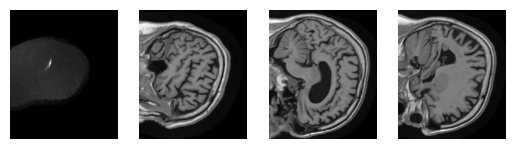

In [18]:
fig, axes = plt.subplots(nrows=1, ncols=4)

# Loop through subplots and draw image
for ii in range(4):
    im = MRI[ii * 40, :, :]
    axes[ii].imshow(im, cmap='gray')
    axes[ii].axis('off')

# Render the figure
plt.show()

## transformer nos données dans un format qui permet l'apprentissage

In [22]:
data_only_MRI = data_clean['MRI_filename']
print('dataset shape : ' , data_only_MRI.shape)
data_only_MRI.head()

dataset shape :  (817,)


0    n_mmni_fADNI_002_S_0413_1.5T_t1w.nii.gz
1    n_mmni_fADNI_002_S_0559_1.5T_t1w.nii.gz
2    n_mmni_fADNI_002_S_0619_1.5T_t1w.nii.gz
3    n_mmni_fADNI_002_S_0685_1.5T_t1w.nii.gz
4    n_mmni_fADNI_002_S_0729_1.5T_t1w.nii.gz
Name: MRI_filename, dtype: object

In [24]:
data_CN_AD = data_clean['AD']
print('dataset shape : ' , data_CN_AD.shape)
print(data_CN_AD.value_counts())
data_CN_AD.head()

dataset shape :  (817,)
0    626
1    191
Name: AD, dtype: int64


0    0
1    0
2    1
3    0
4    0
Name: AD, dtype: uint8

In [25]:
data_CN_AD = data_clean['CN']
print('dataset shape : ' , data_CN_AD.shape)
print(data_CN_AD.value_counts())
data_CN_AD.head()

dataset shape :  (817,)
0    589
1    228
Name: CN, dtype: int64


0    1
1    1
2    0
3    1
4    0
Name: CN, dtype: uint8

On voit que certaines données ne sont ni CN ni AD avec les deux affichages précédents

Il faut uniquement les données avec soit CN soit AD, on crée donc un dataset avec ces données uniquement

In [26]:
data_clean.head()

,Subject ID,Rooster ID,Age,AD,CN,pMCI,sMCI,Sexe_female,Sexe_male,mask_filename,MRI_filename
0,002_S_0413,413,76.3,0,1,0,0,1,0,mask_n_mmni_fADNI_002_S_0413_1.5T_t1w.nii.gz,n_mmni_fADNI_002_S_0413_1.5T_t1w.nii.gz
1,002_S_0559,559,79.3,0,1,0,0,0,1,mask_n_mmni_fADNI_002_S_0559_1.5T_t1w.nii.gz,n_mmni_fADNI_002_S_0559_1.5T_t1w.nii.gz
2,002_S_0619,619,77.5,1,0,0,0,0,1,mask_n_mmni_fADNI_002_S_0619_1.5T_t1w.nii.gz,n_mmni_fADNI_002_S_0619_1.5T_t1w.nii.gz
3,002_S_0685,685,89.6,0,1,0,0,1,0,mask_n_mmni_fADNI_002_S_0685_1.5T_t1w.nii.gz,n_mmni_fADNI_002_S_0685_1.5T_t1w.nii.gz
4,002_S_0729,729,65.1,0,0,1,0,1,0,mask_n_mmni_fADNI_002_S_0729_1.5T_t1w.nii.gz,n_mmni_fADNI_002_S_0729_1.5T_t1w.nii.gz


### Ajout d'une colonne avec AD = 0, CN = 1 et le reste = 2

In [29]:
def categorise(row):  
    if row['CN'] == 1 :
        return 1
    elif row['AD'] ==1 :
        return 0
    else :
        return 2
    
data_clean['CN_AD'] = data_clean.apply(lambda row: categorise(row), axis=1)
data_clean.head()

,Subject ID,Rooster ID,Age,AD,CN,pMCI,sMCI,Sexe_female,Sexe_male,mask_filename,MRI_filename,CN_AD
0,002_S_0413,413,76.3,0,1,0,0,1,0,mask_n_mmni_fADNI_002_S_0413_1.5T_t1w.nii.gz,n_mmni_fADNI_002_S_0413_1.5T_t1w.nii.gz,1
1,002_S_0559,559,79.3,0,1,0,0,0,1,mask_n_mmni_fADNI_002_S_0559_1.5T_t1w.nii.gz,n_mmni_fADNI_002_S_0559_1.5T_t1w.nii.gz,1
2,002_S_0619,619,77.5,1,0,0,0,0,1,mask_n_mmni_fADNI_002_S_0619_1.5T_t1w.nii.gz,n_mmni_fADNI_002_S_0619_1.5T_t1w.nii.gz,0
3,002_S_0685,685,89.6,0,1,0,0,1,0,mask_n_mmni_fADNI_002_S_0685_1.5T_t1w.nii.gz,n_mmni_fADNI_002_S_0685_1.5T_t1w.nii.gz,1
4,002_S_0729,729,65.1,0,0,1,0,1,0,mask_n_mmni_fADNI_002_S_0729_1.5T_t1w.nii.gz,n_mmni_fADNI_002_S_0729_1.5T_t1w.nii.gz,2


In [32]:
data_clean_only_CN_AD = data_clean[data_clean['CN_AD'] != 2]
data_clean_only_CN_AD['CN_AD'].value_counts()

1    228
0    191
Name: CN_AD, dtype: int64

On se retrouve bien avec uniquement des données CN ou AD

In [35]:
data_MRI = data_clean_only_CN_AD['MRI_filename']
print('dataset shape : ' , data_MRI.shape)
data_MRI.head()

dataset shape :  (419,)


0    n_mmni_fADNI_002_S_0413_1.5T_t1w.nii.gz
1    n_mmni_fADNI_002_S_0559_1.5T_t1w.nii.gz
2    n_mmni_fADNI_002_S_0619_1.5T_t1w.nii.gz
3    n_mmni_fADNI_002_S_0685_1.5T_t1w.nii.gz
6    n_mmni_fADNI_002_S_0816_1.5T_t1w.nii.gz
Name: MRI_filename, dtype: object

In [36]:
data_CN_AD = data_clean_only_CN_AD['CN_AD']
print('dataset shape : ' , data_CN_AD.shape)
data_CN_AD.head()

dataset shape :  (419,)


0    1
1    1
2    0
3    1
6    0
Name: CN_AD, dtype: int64

In [43]:
from sklearn.model_selection import train_test_split

X_train_filesnames , y_train, X_test_filesnames, y_test = train_test_split(data_MRI, data_CN_AD, random_state=42, test_size=0.3)
X_train.head()

641    n_mmni_fADNI_126_S_0891_1.5T_t1w.nii.gz
755    n_mmni_fADNI_136_S_0426_1.5T_t1w.nii.gz
214    n_mmni_fADNI_023_S_0058_1.5T_t1w.nii.gz
200    n_mmni_fADNI_022_S_0130_1.5T_t1w.nii.gz
624    n_mmni_fADNI_123_S_0094_1.5T_t1w.nii.gz
Name: MRI_filename, dtype: object

In [44]:
type(X_train_filesnames)

pandas.core.series.Series

In [46]:
X_train_filesnames.to_csv("/home/coleger/Desktop/CV/Alz/X_train_filesnames.csv", index=True)
X_test_filesnames.to_csv("/home/coleger/Desktop/CV/Alz/X_test_filesnames.csv",index=True)
y_train.to_csv("/home/coleger/Desktop/CV/Alz/y_train.csv",index=True)
y_test.to_csv("/home/coleger/Desktop/CV/Alz/y_test.csv",index=True)